In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../pl_stats.csv").sort_values(by='Rk', axis=0)

In [3]:
data.head()

,Squad,Rk,MP,W,D,L,GF,GA,GD,Pts,...,Crs,Int.1,TklW.1,PKwon,PKcon,OG.1,Recov,Won,Lost.1,Won%
0,Manchester City,1,38,28,5,5,94,33,61,89,...,742,223,272,9,3,1,1866,438,364,54.6
1,Arsenal,2,38,26,6,6,88,43,45,84,...,674,237,343,3,5,1,1984,486,559,46.5
2,Manchester Utd,3,38,23,6,9,58,43,15,75,...,517,352,400,2,3,1,2190,465,434,51.7
3,Newcastle Utd,4,38,19,14,5,68,33,35,71,...,740,333,360,2,5,2,2065,553,427,56.4
4,Liverpool,5,38,19,10,9,75,47,28,67,...,799,333,370,3,4,2,2211,482,455,51.4


In [4]:
data['Blocks']

0     339
1     362
2     496
3     448
4     350
5     392
6     438
7     428
8     456
9     455
10    463
11    466
12    497
13    415
14    499
15    500
16    510
17    517
18    536
19    542
Name: Blocks, dtype: int64

In [5]:
def_pressing_stats = ['Squad','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']

In [19]:
squad_names=data['Squad']
def_pressing_stats = ['Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']
shot_goal_creation_stats = ['SCA','SCA90','GCA','GCA90']
possession_stats = ['Poss','90s','Touches','Def Pen','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Live','Att','Succ','Succ%','Tkld','Tkld%','Carries','TotDist','PrgDist','PrgC','1/3','CPA','Mis','Dis','Rec','PrgR']


defensive_action = ['Squad', 'Blocks', 'Sh', 'Pass', 'Tkl+Int']


In [20]:
data_pressing = data.loc[:,def_pressing_stats]
data_possession = data.loc[:,possession_stats]
data_pressing_possession = data_pressing.merge(data_possession).set_index(squad_names)

data_Shot_creation = data.loc[:,shot_goal_creation_stats]

# data_pressing_shot = data_pressing.merge(data_Shot_creation, on= 'Squad').set_index(squad_names).drop(['Squad'], axis=1)


In [21]:
squad_names

0     Manchester City
1             Arsenal
2      Manchester Utd
3       Newcastle Utd
4           Liverpool
5            Brighton
6         Aston Villa
7           Tottenham
8           Brentford
9              Fulham
10     Crystal Palace
11            Chelsea
12             Wolves
13           West Ham
14        Bournemouth
15    Nott'ham Forest
16            Everton
17     Leicester City
18       Leeds United
19        Southampton
Name: Squad, dtype: object

In [22]:
data_pressing.columns

Index(['Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
       'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
      dtype='object')

In [23]:
data_defensive_action = data.loc[:,defensive_action]

In [24]:
data_defensive_action

,Squad,Blocks,Sh,Pass,Tkl+Int
0,Manchester City,339,95,244,694
1,Arsenal,362,86,276,805
2,Manchester Utd,496,146,350,1010
3,Newcastle Utd,448,116,332,940
4,Liverpool,350,74,276,923
5,Brighton,392,104,288,919
6,Aston Villa,438,118,320,957
7,Tottenham,428,148,280,959
8,Brentford,456,168,288,928
9,Fulham,455,125,330,965


In [25]:
# data_defensive_action_overall = data_defensive_action.merge(data_defensive_action, on= 'Squad').set_index(squad_names).drop(['Squad'], axis=1)

In [26]:
data_defensive_action.index

RangeIndex(start=0, stop=20, step=1)

In [27]:
data_defensive_action['aggregate'] = data_defensive_action['Blocks'] + data_defensive_action['Sh'] + data_defensive_action['Pass']

In [28]:
data_defensive_action

,Squad,Blocks,Sh,Pass,Tkl+Int,aggregate
0,Manchester City,339,95,244,694,678
1,Arsenal,362,86,276,805,724
2,Manchester Utd,496,146,350,1010,992
3,Newcastle Utd,448,116,332,940,896
4,Liverpool,350,74,276,923,700
5,Brighton,392,104,288,919,784
6,Aston Villa,438,118,320,957,876
7,Tottenham,428,148,280,959,856
8,Brentford,456,168,288,928,912
9,Fulham,455,125,330,965,910


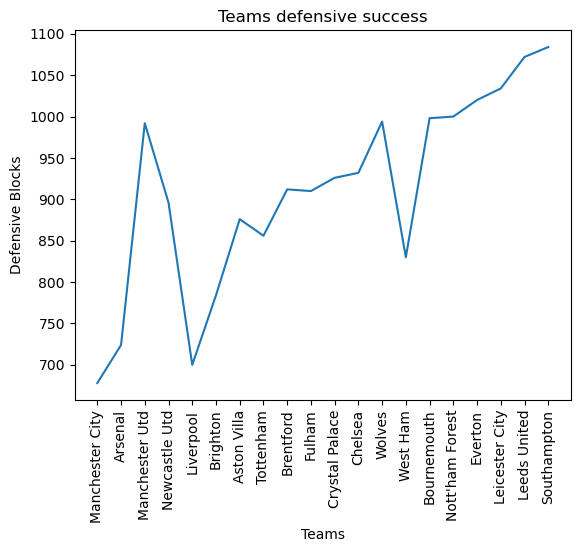

In [29]:
plt.plot(data_defensive_action['Squad'],data_defensive_action["aggregate"])
plt.xticks(rotation=90)
plt.ylabel("Defensive Blocks")
plt.xlabel("Teams")
plt.title("Teams defensive success")
plt.show()

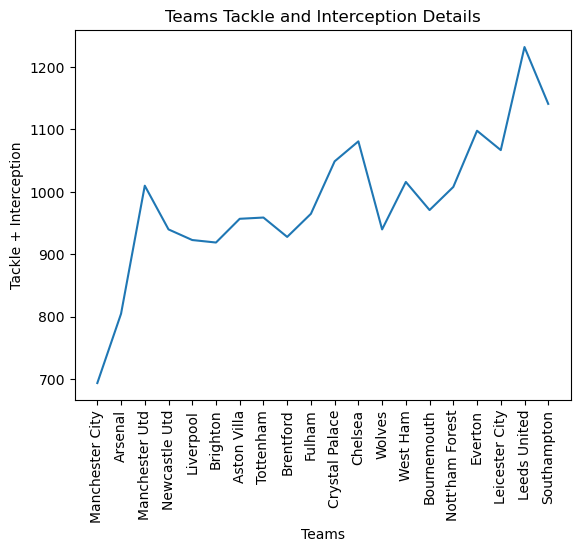

In [31]:
plt.plot(data_defensive_action['Squad'],data_defensive_action["Tkl+Int"])
plt.xticks(rotation=90)
plt.ylabel("Tackle + Interception")
plt.xlabel("Teams")
plt.title("Teams Tackle and Interception Details")
plt.show()

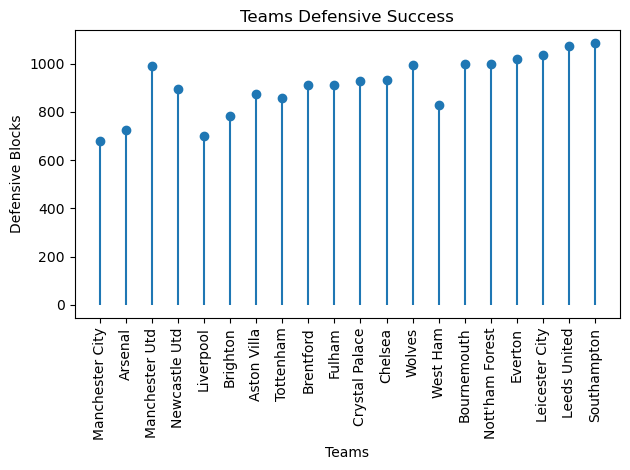

In [32]:
plt.stem(data_defensive_action['Squad'], data_defensive_action["aggregate"], basefmt=" ")
plt.xticks(rotation=90)
plt.ylabel("Defensive Blocks")
plt.xlabel("Teams")
plt.title("Teams Defensive Success")
plt.tight_layout()
plt.show()


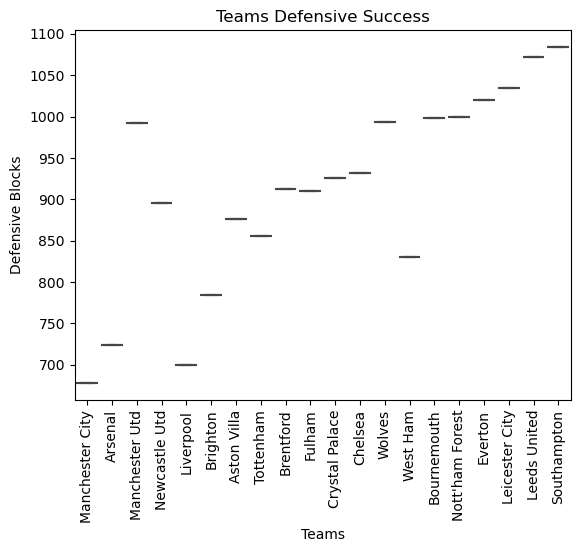

In [33]:
sns.boxplot(x='Squad', y='aggregate', data=data_defensive_action)
plt.xticks(rotation=90)
plt.ylabel("Defensive Blocks")
plt.xlabel("Teams")
plt.title("Teams Defensive Success")
plt.show()


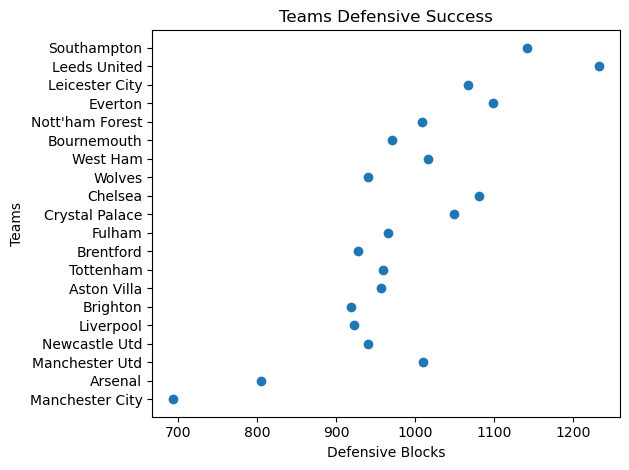

In [35]:
plt.scatter(data_defensive_action["Tkl+Int"], data_defensive_action['Squad'])
plt.xlabel("Defensive Blocks")
plt.ylabel("Teams")
plt.title("Teams Defensive Success")
plt.tight_layout()
plt.show()


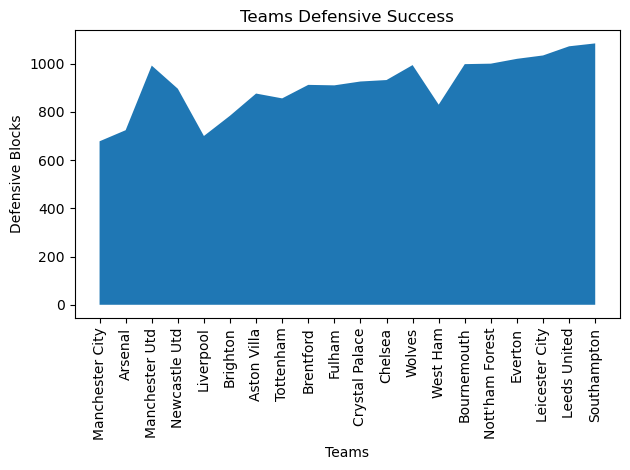

In [37]:
plt.fill_between(data_defensive_action['Squad'], data_defensive_action["aggregate"])
plt.xticks(rotation=90)
plt.ylabel("Defensive Blocks")
plt.xlabel("Teams")
plt.title("Teams Defensive Success")
plt.tight_layout()
plt.show()


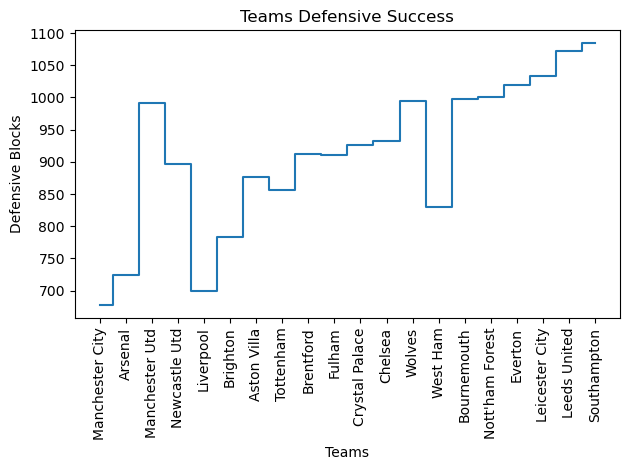

In [38]:
plt.step(data_defensive_action['Squad'], data_defensive_action["aggregate"], where='mid')
plt.xticks(rotation=90)
plt.ylabel("Defensive Blocks")
plt.xlabel("Teams")
plt.title("Teams Defensive Success")
plt.tight_layout()
plt.show()


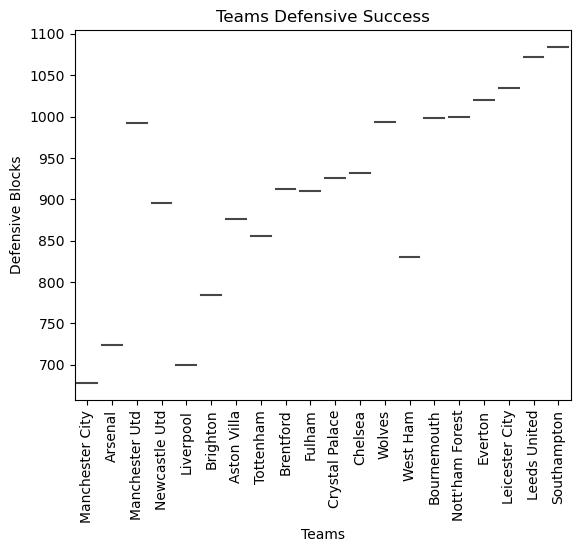

In [41]:
sns.violinplot(x='Squad', y='aggregate', data=data_defensive_action)
plt.xticks(rotation=90)
plt.ylabel("Defensive Blocks")
plt.xlabel("Teams")
plt.title("Teams Defensive Success")
plt.show()


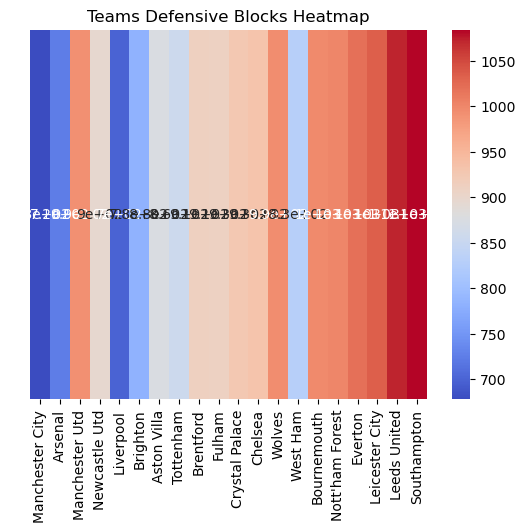

In [44]:
# Create a DataFrame with each team as a row and a single 'Blocks' column
heatmap_data = pd.DataFrame(data_defensive_action["aggregate"]).transpose()
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, yticklabels=False)
plt.xticks(np.arange(0.5, len(data_defensive_action['Squad'])), data_defensive_action['Squad'], rotation=90)
plt.title("Teams Defensive Blocks Heatmap")
plt.show()


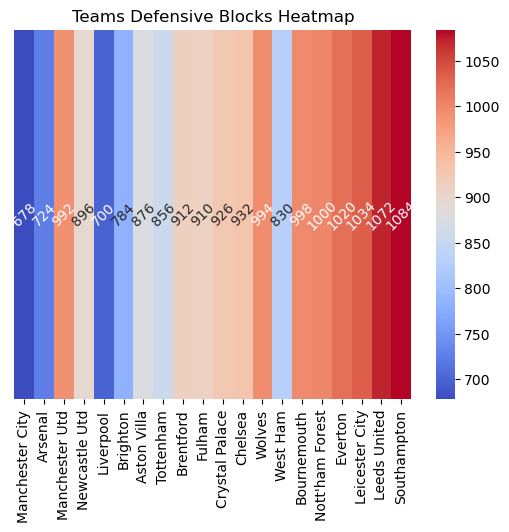

In [46]:
# Your heatmap creation code with fmt parameter set to 'd' for integer formatting
ax = sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, yticklabels=False, fmt='d')

# Rotate the annotations if needed
for text in ax.texts:
    text.set_rotation(45)

# Rest of your plotting code
plt.xticks(np.arange(0.5, len(data_defensive_action['Squad'])), data_defensive_action['Squad'], rotation=90)
plt.title("Teams Defensive Blocks Heatmap")
plt.show()




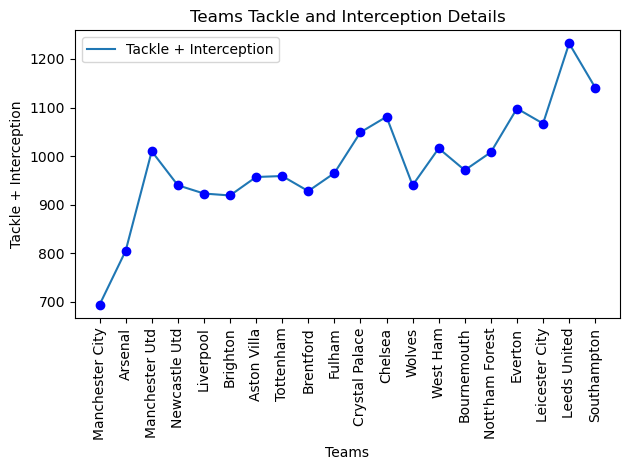

In [48]:
# Plot the line
plt.plot(data_defensive_action['Squad'], data_defensive_action["Tkl+Int"], label='Tackle + Interception')

# Highlight the points with scatter plot markers
plt.scatter(data_defensive_action['Squad'], data_defensive_action["Tkl+Int"], color='blue', zorder=5)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)

# Labels and title
plt.ylabel("Tackle + Interception")
plt.xlabel("Teams")
plt.title("Teams Tackle and Interception Details")

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlapping
plt.show()


In [49]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

In [53]:
bar_plot(data_defensive_action['Squad'],data)

AttributeError: 'Series' object has no attribute 'bar'